In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# for air gas constant (J/Kg/K)
R = 287
# Sea level temprature (Kelvin)
T0 = 288.16
# Sea level density (Kg/m3)
rho0 = 1.225
# Sea level Pressure (Pa)
P0 = 1.01325*pow(10,5)
# Sea level altitude (m)
H0 = 0
# Sea level gravitational acceleration (m/s2)
g0 = 9.81
# radius of earth (m)
r0 = 6400000

In [3]:
H = np.linspace(0,500,500)
# rho = 1.2*np.exp(-2.9*pow(10,-5)*pow(H*1000,1.15))
T = np.zeros((len(H),1))

In [4]:
lamda = [-6.5,0.0,1.0,2.8,0.0,-2.8,-2.0,0.0,12.0]

In [5]:
def Atmosphere(H,T0 = T0,lamda = lamda[0],H0 = H0):
    if lamda == 0:
        T = T0
    else:
        if H <= 91 or (H >110 and H <= 120):
            T = T0 + lamda*(H - H0)
        elif (H > 91 and H <=110):
            Tc = 263.1905
            A = -76.3232
            a = -19.9429
            T = Tc + A*(pow((1-pow(((H-H0)/a),2)),0.5))
        else:
            Tinf = 1000
            lam = 0.01875
            epsilon = (H-H0)*((r0 + H0)/(r0 + H))
            T = Tinf - (Tinf-T0)*np.exp(-lam*epsilon)
    return T

In [6]:
for h in range(0,len(H)):
    if h <= 11:
        T[h] = Atmosphere(H[h],T0=T0,lamda=lamda[0],H0=H0)
    if (h > 11 and h <=20):
        T[h] = Atmosphere(H[h],T0=T[11],lamda=lamda[1],H0=H[11])
    if (h >20 and h <=32):
        T[h] = Atmosphere(H[h],T0=T[20],lamda=lamda[2],H0=H[20])
    if (h >32 and h <= 47):
        T[h] = Atmosphere(H[h],T0=T[32],lamda=lamda[3],H0=H[32])
    if (h > 47 and h <= 51):
        T[h] = Atmosphere(H[h],T0=T[47],lamda=lamda[4],H0=H[47])
    if (h > 51 and h <= 71):
        T[h] = Atmosphere(H[h],T0=T[51],lamda=lamda[5],H0=H[51])
    if (h > 71 and h <= 84):
        T[h] = Atmosphere(H[h],T0=T[71],lamda=lamda[6],H0=H[71])
    if (h > 84 and h <= 91):
        T[h] = Atmosphere(H[h],T0=T[84],lamda=lamda[7],H0=H[84])
    if (h > 91 and h <= 110):
        T[h] = Atmosphere(H[h],T0=T[91],lamda=lamda[8],H0=H[91])
    if (h > 110 and h <= 120):
        T[h] = Atmosphere(H[h],T0=T[110],lamda=lamda[8],H0=H[110])
    if (h > 120):
        T[h] = Atmosphere(H[h],T0=T[120],lamda=lamda[8],H0=H[120])
    

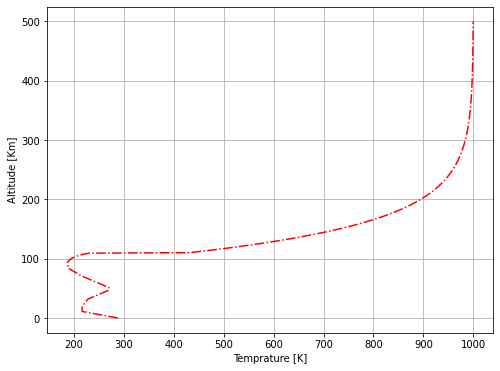

In [7]:
plt.figure(figsize=(8,6));
plt.plot(T,H,"-.r");plt.grid();plt.xlabel("Temprature [K]");plt.ylabel("Altitude [Km]");

In [18]:
T[110]

array([432.08595937])